In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import math
from datetime import datetime
import matplotlib.gridspec as gridspec

In [2]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [3]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [4]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [5]:
data.fillna({'Variety':'None','Previous crop': 'None', 'Seed units': '0'}, inplace=True)

In [6]:
convert_todot = lambda x: float(x.replace(',','.'))

In [7]:
data['Area'] = data['Area'].apply(convert_todot)

In [8]:
for i in list(data)[7:23]:
    try:
        data[i] = data[i].apply(convert_todot)
    except ValueError:
        continue

In [9]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
dfdates = data.loc[i1]

In [10]:
drop2 = dfdates['Harvest date'].dropna()
i2 = list(drop2.index.values)
dfdates = dfdates.loc[i2]

In [11]:
convert_date = lambda x: datetime.strptime(str(x), '%d.%m.%Y')

In [12]:
dfdates['Planting date'] = dfdates['Planting date'].apply(convert_date)
dfdates['Harvest date'] = dfdates['Harvest date'].apply(convert_date)

In [13]:
crops = list(data['Crop'].unique())
crops

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

In [14]:
n = len(crops)

In [15]:
def plot_ph_date(dfdates,i):
    crop = list(dfdates['Crop'].unique())
    fig = plt.figure(figsize=(15,8))
    gs = gridspec.GridSpec(2,2)
    df = dfdates[dfdates['Crop']==crop[i]]
    
    ax1 = fig.add_subplot(gs[0,:])
    ax1.hist(df['Planting date'],color='darkgreen')
    ax1.hist(df['Harvest date'],color='darkorange')
    ax1.set_ylabel('counts',fontsize=16,fontstyle='italic')
    ax1.legend()
    ax1.grid(axis='y',color='lightgrey',alpha=0.5)
    
    dates = ['Planting date','Harvest date']
    for j in range(2):
        index = []
        for k in df[dates[j]].index.values:
            if df.loc[k,dates[j]].year == 2017:
                index.append(k)
        ph_dates = df[dates[j]].loc[index]
        ax = fig.add_subplot(gs[1,j])
        ax.hist(ph_dates.values,color='darkgreen')
        ax.set_title('Distribution of '+dates[j]+' for 2017. year')
        ax.set_ylabel('counts',fontsize=10,fontstyle='italic')
        ax.set_xlabel(dates[j], fontsize=10,fontstyle='italic')
        ax.grid(axis='y',color='lightgrey',alpha=0.5)
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)
    
    fig.align_labels()
    fig.suptitle(crop[i], fontsize = 20, y=0.99)
    fig.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
    plt.show()

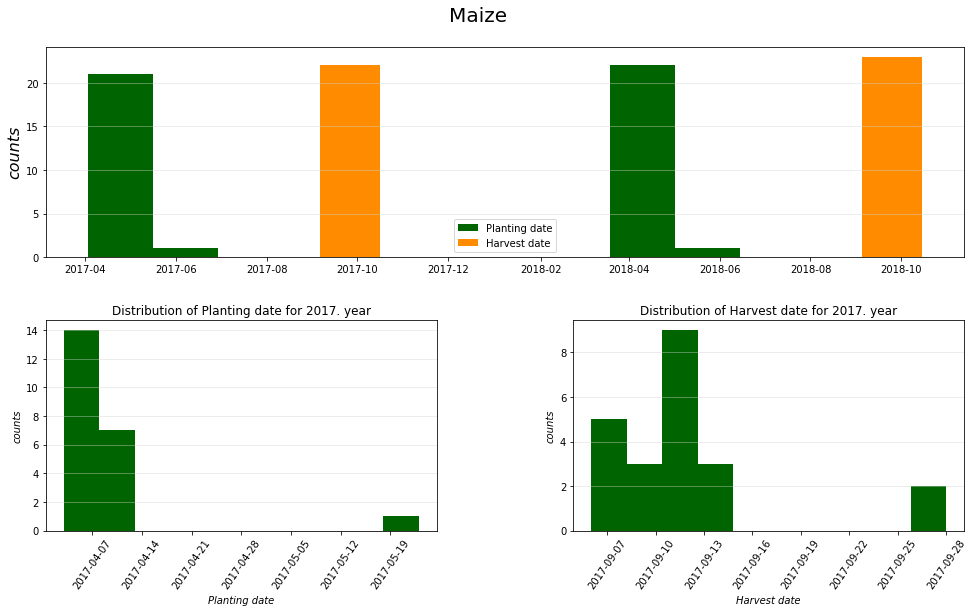

In [16]:
plot_ph_date(dfdates,0)

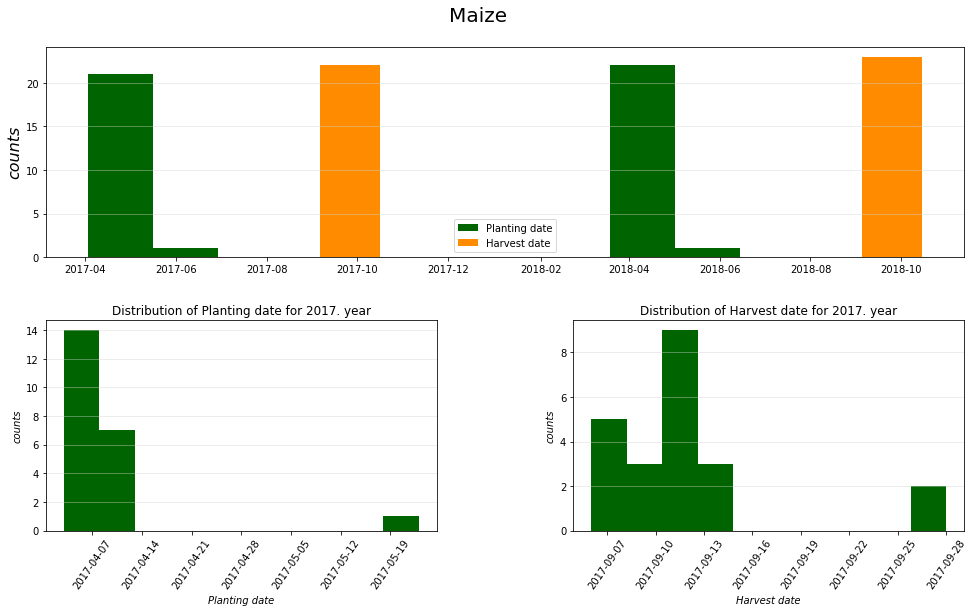

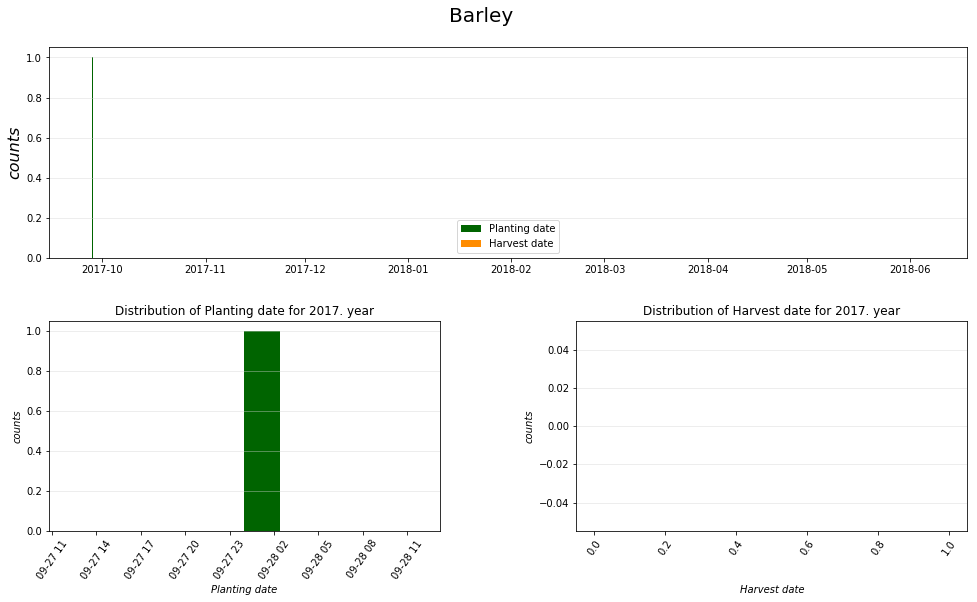

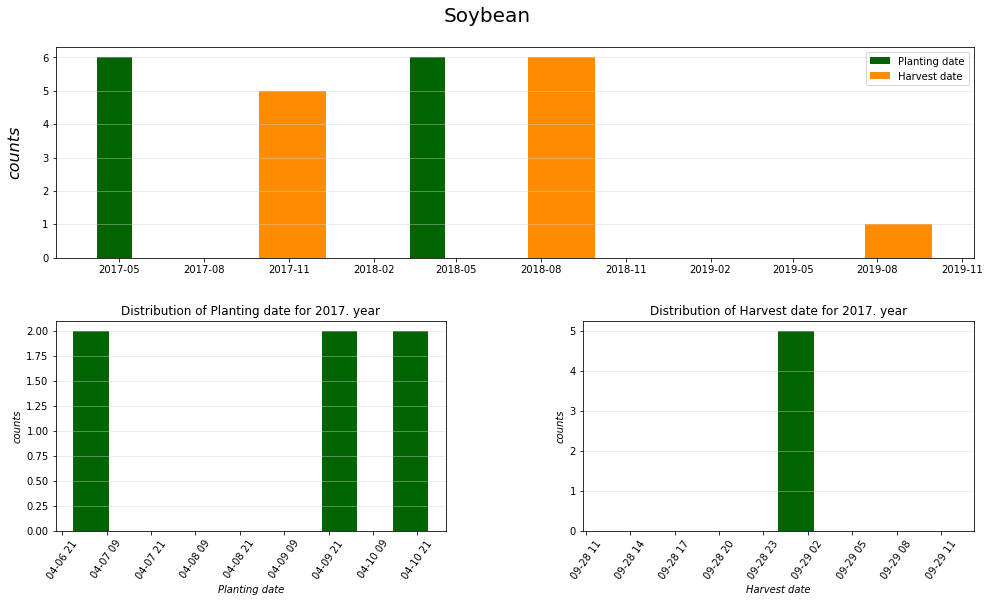

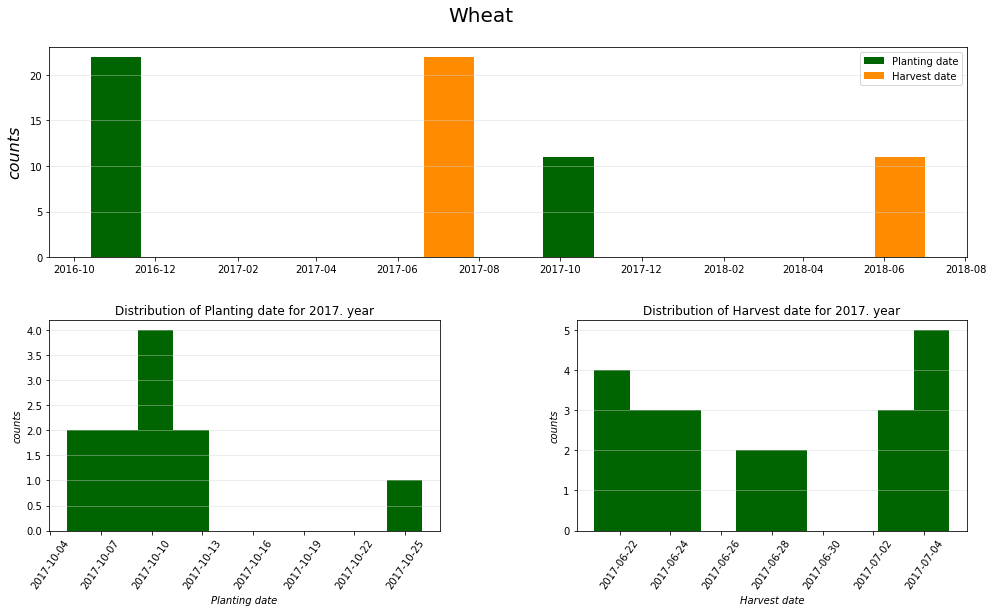

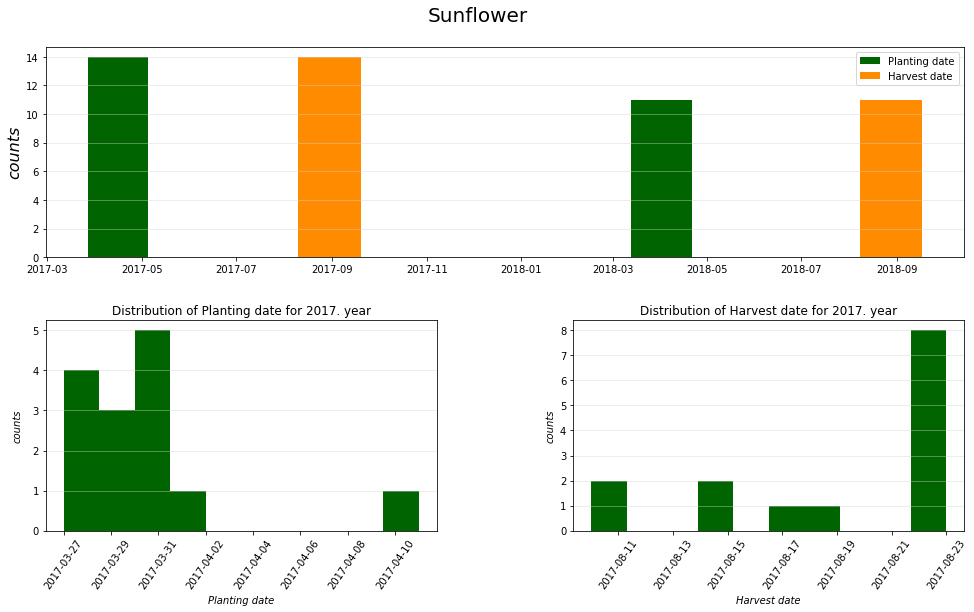

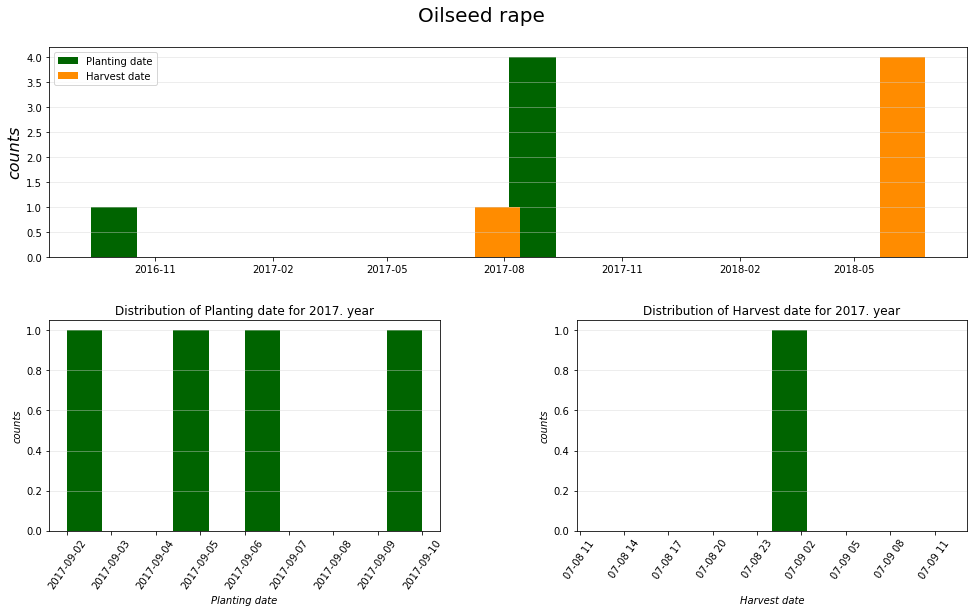

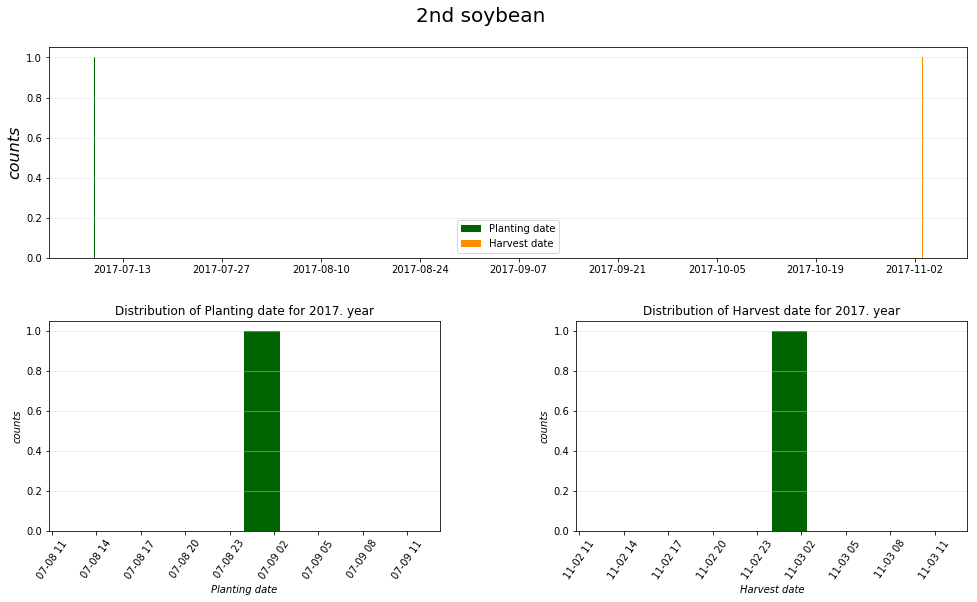

In [17]:
for i in range(n):
    plot_ph_date(dfdates,i)

In [18]:
def plot_yield(data,i):
    crop = list(data['Crop'].unique())
    
    df2 = data[data['Crop']==crop[i]]
    
    df16 = df2[df2['Year'] == 2016]
    std16 = np.std(df16['Yield'])
    df17 = df2[df2['Year'] == 2017]
    std17 = np.std(df17['Yield'])
    df18 = df2[df2['Year'] == 2018]
    std18 = np.std(df18['Yield'])    
    
    box_line_col = ['steelblue','darkorange','darkgreen']
    if df16.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
    if df17.shape[0] <= 2:
        df2 = df2.query('Year == 2016 or Year == 2018')
        box_line_col = ['steelblue','darkorange']
        if df16.shape[0] <= 2:
            box_line_col = ['steelblue']
            
    if df18.shape[0] <= 2:
        df2 = df2.query('Year == 2017 or Year == 2016')
        box_line_col = ['steelblue','darkgreen']
        if df17.shape[0] <= 2:
            box_line_col = ['darkorange']
    
    if df2.shape[0] <= 2:
        fig = plt.figure(figsize=(10,1))
        ax = fig.add_subplot(111)
        ax.text(0.15,1.5,'A little bit of data for '+crop[i]+'! Please expand your database.',fontsize=20,fontweight='bold',color='r')
        plt.axis('off')
    else:
        fig2 = plt.figure(figsize=(10,5))
        ax = fig2.add_subplot(1,1,1)
        palette = ["lightsteelblue", "navajowhite", "lightgreen"]
        sns.boxplot(x='Year',y='Yield',data=df2,palette=palette)
        ax.grid(axis='y',color='darkgray')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_color('darkgray')
    
    
    
        for j,col in enumerate(box_line_col):
            mybox = ax.artists[j]
            mybox.set_edgecolor(col)
            for k in range(j*6,j*6+6):
                line = ax.lines[k]
                line.set_color(col)
                line.set_mfc(col)
                line.set_mec(col)
    
        text = '\n'.join(('Variability of yield:',"\u2022 std 2016: "+str(round(std16,2)), '\u2022 std 2017: '+str(round(std17,2)),
                      '\u2022 std 2018: '+str(round(std18,2))))
        props = dict(boxstyle='round',facecolor='white', edgecolor='darkgreen', alpha=0.5,pad=0.5)
        plt.figtext(0.99, 0.4,text,family='sans-serif', color='k', fontsize=13, bbox=props)
    
        fig2.tight_layout()
        fig2.suptitle(crop[i],x=0.5,y=1.05,fontsize=20,fontweight='bold')
        plt.show()

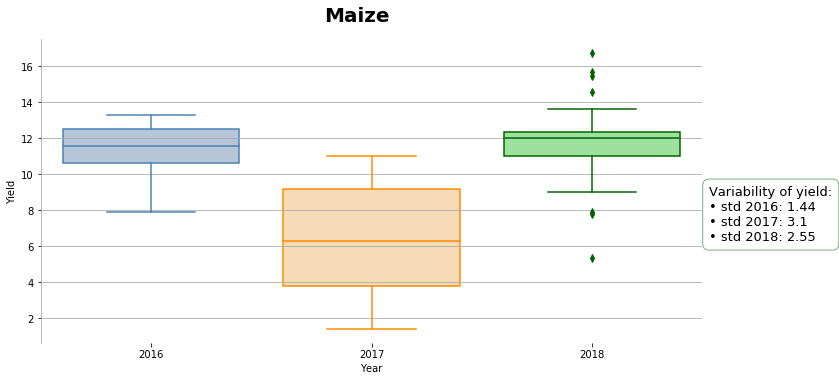

In [19]:
plot_yield(data,0)

In [ ]:
for i in range(n):
    plot_yield(data,i)

In [20]:
def func(pct, allvals):
    percent = float((100*pct)/allvals.sum())
    return "{:.2f}%".format(pct,percent)

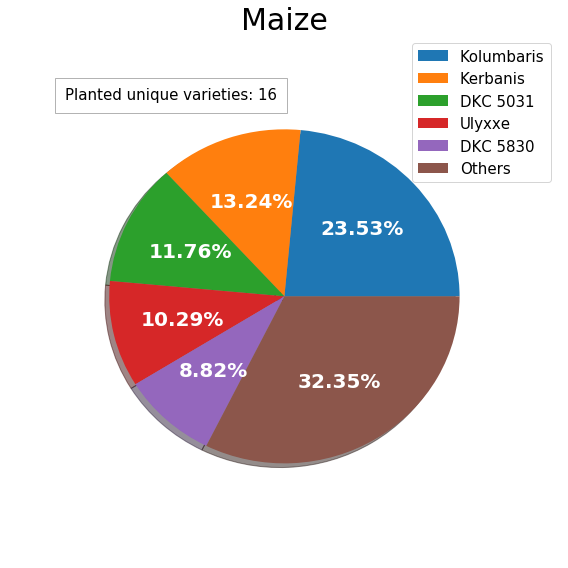

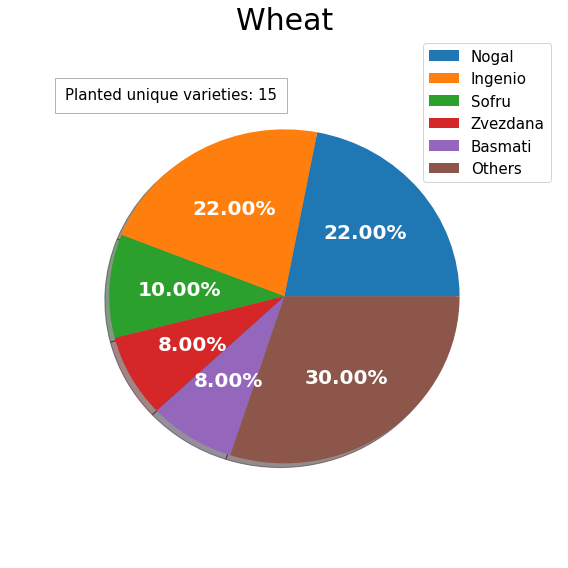

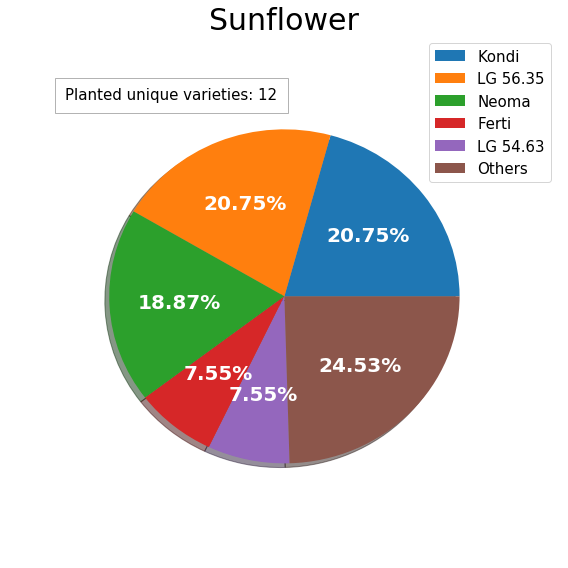

In [21]:
for i in range(n):
    
    df5 = data[data['Crop'] == crops[i]]
    length = len(df5['Variety'].unique())
    
    if length>4:
        fig5 = plt.figure(figsize=(8,8))
        ax5 = fig5.add_subplot(111)
    
        vc = df5['Variety'].value_counts()
        sort = vc.sort_values(ascending=False)
        ssum = sort.sum()
        pie = sort.iloc[:5]
        pie = pie.append(pd.Series([ssum-pie.sum()],index=['Others']))
        
        wedges, texts, autotexts = ax5.pie(x=pie, labels=list(pie.index.values),autopct=lambda pct: func(pct, pie),radius=0.8,shadow=True, textprops=dict(color="w"))
        plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
        ax5.set_title(crops[i],fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
        ax5.legend(loc=1,fontsize=15)
    
        props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
        text = 'Planted unique varieties: '+str(length)
        ax5.text(-1,1,text,bbox=props,fontsize=15,va='top', ha='left')

        ax5.axis('off')
    
    
        fig5.tight_layout()
plt.show()

In [22]:
pivot = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0,margins=True)
pivot

Crop,2nd soybean,Barley,Maize,Oilseed rape,Soybean,Sunflower,Wheat,All
Previous crop,,,,,,,,
Maize,0,1,1,0,10,8,15,35
None,0,1,30,0,6,38,19,94
Oilseed rape,0,0,0,0,0,0,1,1
Soybean,0,0,12,0,0,0,0,12
Sunflower,0,0,9,0,0,0,15,24
Wheat,1,0,16,5,2,7,0,31
All,1,2,68,5,18,53,50,197


In [23]:
chi2,p,q,expected = stats.chi2_contingency(pivot)
chi2,p,q

(129.26015449260603, 8.143347636363078e-11, 42)

In [26]:
def cdf(x,q):
    return 1/(math.pow(2,q/2)*math.gamma(q/2))*math.pow(x,q/2-1)*math.pow(math.e,-x/2)
def cdf_array(x,q):
    l = []
    for i in x:
        l.append(float(cdf(i,q)))
    return np.array(l)

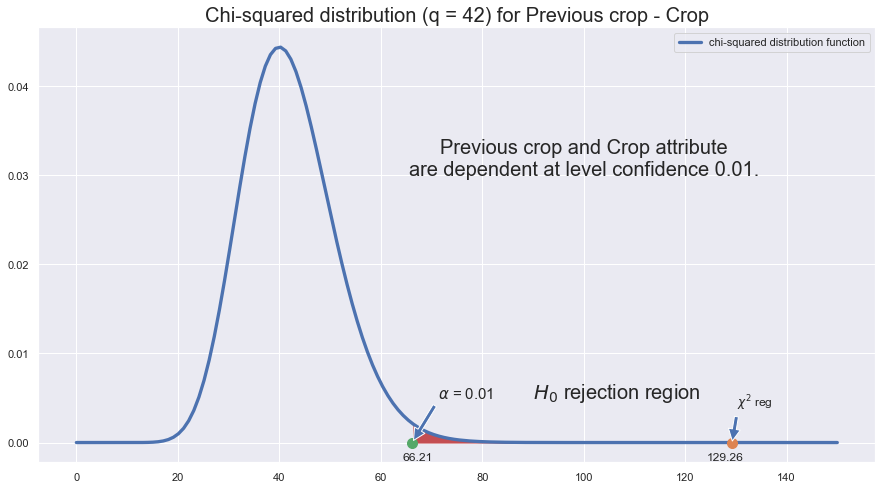

In [27]:
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})

x = np.linspace(0,150,150)
ax = sns.lineplot(x,cdf_array(x,q),label='chi-squared distribution function',linewidth=3.3)



ax.plot([chi2], [cdf(chi2,q)], 'o',markersize=10)
ax.text(chi2-5,cdf(chi2,q)-0.002,str(round(chi2,2)))
ax.annotate(r'$\chi^2 $ reg',xy=(chi2,0),xytext=(chi2+1,0.004),arrowprops=dict(facecolor='b', shrink=0.05))

alpha = stats.chi2.ppf(0.99,q)
ax.fill_between(x,0,cdf_array(x,q),where=x>alpha,color='r')
ax.plot([alpha], [0], 'o',markersize=10)
ax.text(alpha-2,cdf(chi2,q)-0.002,str(round(stats.chi2.ppf(0.99,q),2)))
ax.annotate(r'$ \alpha $ = 0.01',xy=(alpha,0),xytext=(alpha+5,0.005),fontsize=15,arrowprops=dict(facecolor='b', shrink=0.05))
ax.text(90,0.005,'$ H_0 $ rejection region',fontsize=20)

if p <= 0.01:
    ax.text(100,0.03,'Previous crop and Crop attribute\n are dependent at level confidence 0.01.',ha='center',wrap=True,fontsize=20)
elif p <= 0.05:
    ax.text(100,0.03,'Previous crop and Crop attribute are dependent at level confidence 0.05.',ha='center',wrap=True,fontsize=20)
else:
    ax.text(100,0.03,'Previous crop and Crop attribute are independent.',ha='center',wrap=True,fontsize=20)

""" If the null hypothesis is true, the observed and expected frequencies will be close in value and the χ2 statistic will be 
close to zero. If the null hypothesis is false, then the χ2 statistic will be large"""
ax.set_title('Chi-squared distribution (q = '+str(q)+') for Previous crop - Crop',fontsize=20,fontweight=5)
plt.show()

In [28]:
dfdates['Duration of \n season (days)'] = dfdates['Harvest date']-dfdates['Planting date']

In [29]:
dfdates['Duration of \n season (days)'] = dfdates['Duration of \n season (days)'].apply(lambda x: float(x.days))
dfdates

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date,Duration of season (days)
0,G-1/1,63.38,2018,Maize,0,NS 205,Maize,184.000000,0.000000,237.719575,...,11853.74,9450.000000,5037.277795,15202.253080,7.811455,14.40,112484.94790,2018-06-15,2018-10-15,122.0
1,G-1/2,23.01,2018,Barley,0,Salamandre,Maize,46.000000,0.000000,238.636364,...,11762.74,8594.306050,7079.225979,1435.000000,7.146352,15.80,112912.36650,2017-09-28,2018-06-05,250.0
2,G-2/1,94.88,2018,Soybean,0,Gorstak,Maize,100.330000,0.000000,214.633115,...,11549.50,10191.216890,7146.257137,11843.414040,3.388877,37.35,126574.56120,2018-04-19,2018-09-13,147.0
3,G-2/2,20.59,2018,Soybean,0,Wendy,Maize,93.150000,0.000000,140.845070,...,11571.08,5428.848956,4776.056338,12594.378820,3.712967,37.35,138679.33460,2018-04-17,2018-09-14,150.0
4,G-3/1,63.62,2018,Maize,0,DKC 5830,Wheat,60.000000,1.886199,474.693493,...,12801.04,19899.770510,19745.513990,4947.696479,14.602326,14.40,210273.49890,2018-04-17,2018-09-14,150.0
5,G-3/2,17.80,2018,Maize,0,DKC 5830,Wheat,14.000000,2.134831,264.044944,...,12801.04,16595.812360,8427.921348,6112.939326,13.635393,14.40,196349.66290,2018-04-17,2018-09-14,150.0
6,G-4/1,63.32,2018,Soybean,0,Galeb,Maize,74.226153,0.000000,307.643714,...,11571.08,7447.109918,10072.501580,11048.218540,3.975837,37.35,148497.51260,2018-04-13,2018-09-16,156.0
7,G-4/2,24.71,2018,Soybean,0,Galeb,Maize,80.938891,0.000000,273.735330,...,11571.08,7447.109918,10072.501580,11048.218540,4.068798,37.35,151969.60740,2018-04-13,2018-09-16,156.0
8,G-5/1,76.88,2018,Maize,0,DKC 5830,Soybean,0.949532,0.000000,386.485432,...,12801.04,20071.655440,7823.860562,9002.979318,16.763788,14.40,241398.54320,2018-04-13,2018-09-16,156.0
9,G-5/2,20.98,2018,Maize,0,DKC 5830,Soybean,0.810296,0.000000,266.920877,...,12801.04,19877.951480,8530.791230,7781.716397,11.231649,14.40,161735.74830,2018-04-13,2018-09-16,156.0


In [30]:
def corr(y):    
    Z = {}  #for centered attributes vectors
    for j in list(y):
        mean = y[j].sum()*(1/y[j].shape[0])
        Z[j] = [i - mean for i in y[j]] #centered vector for attribute j
        
    df_dic = {' ': list(y)}
    for j in list(y):
        Zj = np.array(Z[j])
        df_list = []
        for i in list(y):
            Zi = np.array(Z[i])
            norm_Zj = np.linalg.norm(Zj,2)
            norm_Zi = np.linalg.norm(Zi,2)
            df_list.append(np.dot(np.transpose(Zj/norm_Zj),Zi/norm_Zi)) #corr = cos(teta) for every two attributes i and j
        df_dic[j] = df_list #correlations for attribute j relative to all attributes (include corr for j,j) 
    columns = list(df_dic.keys())
    sigmaCorr = pd.DataFrame(df_dic, columns = columns)
    sigmaCorr = sigmaCorr.set_index(' ')
    sns.set(font_scale=1, rc={"figure.figsize": (8, 8)})
    ax = sns.heatmap(sigmaCorr, square=True, annot=True,annot_kws={'fontsize': 20},cmap="YlGn")
    ax.set_yticklabels(list(y),fontsize=13,rotation=0)
    ax.set_xticklabels(list(y),fontsize=13,rotation=90)
    plt.title('Heat map for correlation', fontsize='20')
    return sigmaCorr

In [31]:
corr_list = ['Yield','Seed','Fertiliser','Pesticide','Duration of \n season (days)']

In [32]:
dfcorr = dfdates[corr_list]
for i in corr_list:
    for j in dfcorr[i].index.values:
        if dfcorr.loc[j,i] == 0:
            dfcorr = dfcorr.drop(j,axis=0)

In [33]:
dfcorr.dtypes

Yield                           float64
Seed                            float64
Fertiliser                      float64
Pesticide                       float64
Duration of \n season (days)    float64
dtype: object

,Yield,Seed,Fertiliser,Pesticide,Duration of season (days)
,,,,,
Yield,1.000000,0.565828,-0.087551,-0.383526,-0.078732
Seed,0.565828,1.000000,0.002490,-0.508070,-0.320707
Fertiliser,-0.087551,0.002490,1.000000,0.229648,0.223011
Pesticide,-0.383526,-0.508070,0.229648,1.000000,0.147258
Duration of \n season (days),-0.078732,-0.320707,0.223011,0.147258,1.000000


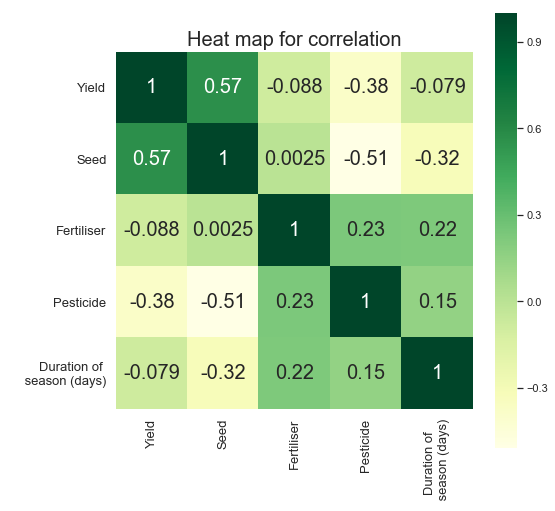

In [34]:
corr(dfcorr)

In [35]:
costs = list(data)[11:20]
costs

['Tillage',
 'Sowing',
 'Fertiliser application',
 'Pesticide application',
 'Irrigation',
 'Harvest',
 'Seed',
 'Fertiliser',
 'Pesticide']

In [36]:
dfcosts = data[costs]
for i in dfcosts['Pesticide application'].index.values:
    try:
        float(dfcosts.loc[i,'Pesticide application'].replace(',','.'))
    except ValueError:
        dfcosts = dfcosts.drop(i,axis=0)
dfcosts['Pesticide application'] = dfcosts['Pesticide application'].apply(convert_todot)

In [37]:
data['Profit'] = data['Revenue'] - dfcosts.sum(axis=1)

In [38]:
sort = data['Profit'].sort_values(ascending=False)

In [39]:
parcel = []
crop_list = []
area = []
profit = []
yield_ = []
for i in sort[:5].index.values:
    profit += [round(sort.loc[i],2)]
    parcel += [data.loc[i,'Parcel']]
    crop_list += [data.loc[i,'Crop']]
    area += [round(data.loc[i,'Area'],2)]
    yield_ += [round(data.loc[i,'Yield']*1000,2)]
d = {'Parcel': parcel,'Area (ha)': area,'Crop': crop_list,'Yield (kg/ha)': yield_,'Profit (RSD/ha)': profit}
top5 = pd.DataFrame(d,columns=['Parcel','Area (ha)','Crop','Yield (kg/ha)','Profit (RSD/ha)'])
top5

,Parcel,Area (ha),Crop,Yield (kg/ha),Profit (RSD/ha)
0,167B,3.77,Sunflower,7750.00,170463.89
1,ED Backa,3.56,Sunflower,7310.00,152209.42
2,G-5/1,76.88,Maize,16763.79,147285.83
3,G-8/1,78.49,Maize,15672.08,144390.43
4,G-3/2,17.80,Maize,13635.39,124376.19


In [40]:
grouped_profit = data['Profit'].groupby(data['Crop'])
profit_mean = grouped_profit.mean()
profit_mean

Crop
2nd soybean    -36906.834983
Barley          50174.853969
Maize           57599.027525
Oilseed rape    38036.122779
Soybean         62208.379766
Sunflower       26573.120755
Wheat           20725.734688
Name: Profit, dtype: float64

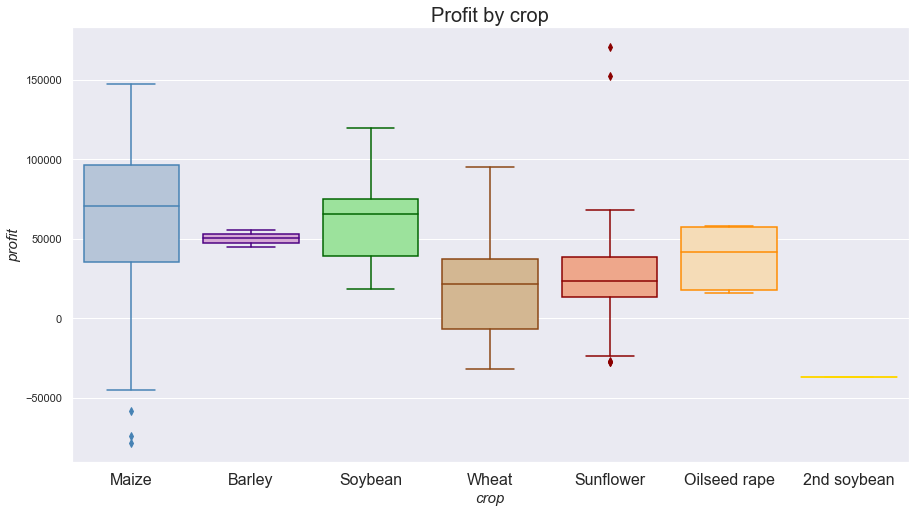

In [41]:
sns.set(style='darkgrid',rc={"figure.figsize": (15, 8)})
palette=['lightsteelblue','plum','lightgreen','burlywood','lightsalmon','navajowhite','gold']
ax = sns.boxplot(x='Crop',y='Profit',data=data[['Crop','Profit']],palette=palette)

box_line_col = ['steelblue','indigo','darkgreen','saddlebrown','darkred','darkorange','gold']

for j,col in enumerate(box_line_col):
    mybox = ax.artists[j]
    mybox.set_edgecolor(col)
    for k in range(j*6,j*6+6):
        line = ax.lines[k]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

ax.set_ylabel('profit',fontsize=15,style='italic')
ax.set_xlabel('crop',fontsize=15,style='italic')
ax.set_xticklabels(crops,fontsize=16)

ax.set_title('Profit by crop', fontsize=20)
plt.show()

In [42]:
sorted_profit = profit_mean.sort_values(ascending=False)
sorted_profit

Crop
Soybean         62208.379766
Maize           57599.027525
Barley          50174.853969
Oilseed rape    38036.122779
Sunflower       26573.120755
Wheat           20725.734688
2nd soybean    -36906.834983
Name: Profit, dtype: float64

In [43]:
profit_std = grouped_profit.std()
profit_std

Crop
2nd soybean              NaN
Barley           7860.820524
Maize           53521.963942
Oilseed rape    20674.666337
Soybean         29298.820126
Sunflower       36091.136935
Wheat           33398.308669
Name: Profit, dtype: float64

In [44]:
relative = profit_std.apply(lambda x: x**2)/profit_mean
relative

Crop
2nd soybean              NaN
Barley           1231.543182
Maize           49733.489389
Oilseed rape    11237.786528
Soybean         13799.119411
Sunflower       49018.336131
Wheat           53819.420092
Name: Profit, dtype: float64

In [45]:
import statistics
df5 = data[data['Crop'] == 'Barley']
statistics.variance(df5['Profit'].values)

61792499.30585298

In [65]:
sorted_relative = relative.sort_values(ascending=False)
sorted_relative

Crop
Wheat           53819.420092
Maize           49733.489389
Sunflower       49018.336131
Soybean         13799.119411
Oilseed rape    11237.786528
Barley           1231.543182
2nd soybean              NaN
Name: Profit, dtype: float64

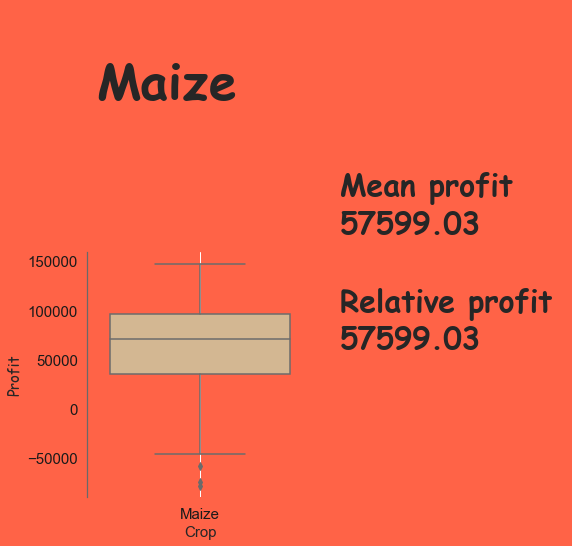

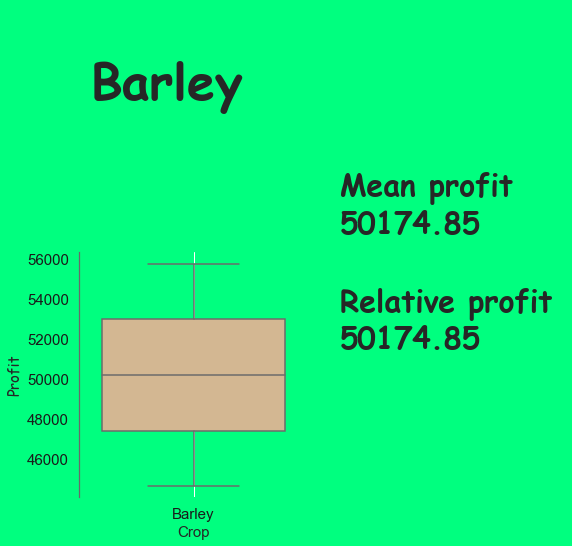

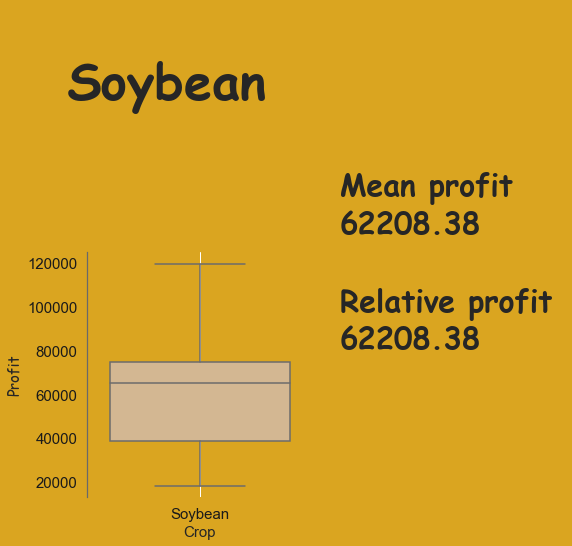

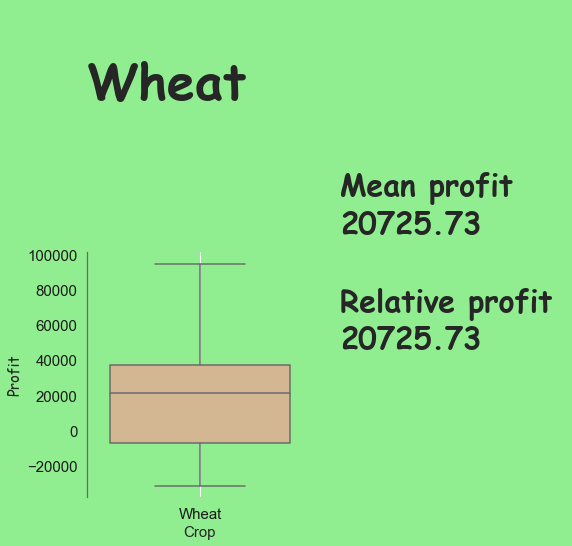

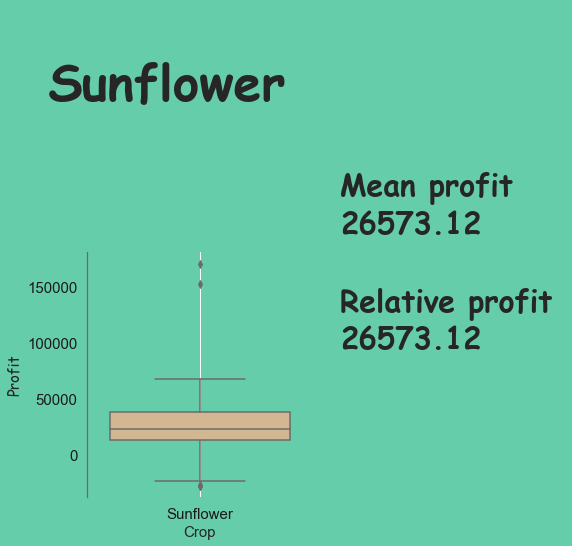

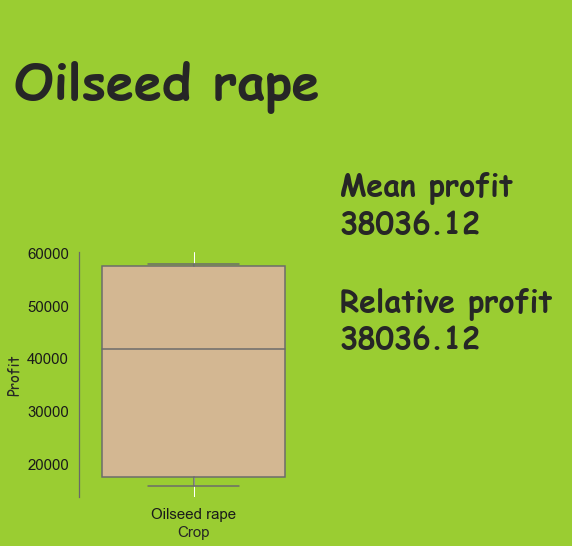

In [57]:
fn = {'fontname':'Comic Sans MS'}
palette = ['tomato','springgreen','goldenrod','lightgreen','mediumaquamarine','yellowgreen']

for i in range(n):
    if crops[i] == '2nd soybean':
        continue
    fig = plt.figure(figsize=(8,8),facecolor=palette[i])
    gs = gridspec.GridSpec(2,2)
    data2 = data[data['Crop'] == crops[i]]
    ax = fig.add_subplot(gs[0,0])
    sns.boxplot(x='Crop',y='Profit',data=data2,ax=ax, palette=['burlywood'])
    ax.set_facecolor(palette[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('dimgray')
    ax.tick_params(axis='y', colors='k',labelsize=15)
    ax.tick_params(axis='x', colors='k',labelsize=15)
    plt.ylabel('Profit',fontsize=15,fontdict=fn)
    plt.xlabel('Crop',fontsize=15)
    ax.grid(None)
    rect = ax.patch
    rect.set_facecolor(palette[i])
    rect.set_height(2)
    rect.set_width(2)
    rect.set_xy((0.005,0.005))
    plt.figtext(0.6,1,'Mean profit \n'+str(round(profit_mean[crops[i]],2)),fontsize=30,fontweight='bold',fontdict=fn)
    plt.figtext(0.6,0.8,'Relative profit \n'+str(round(profit_mean[crops[i]],2)),fontsize=30,fontweight='bold',fontdict=fn)
    
    fig.suptitle(crops[i],x=0.3,y=1.3,fontsize=50,fontweight='bold',fontdict=fn)
    fig.tight_layout()    
plt.show()

In [ ]:
import matplotlib
palette = ['tomato','springgreen','goldenrod','lightsteelblue','violet','yellowgreen']
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(6,6)
for i in range(n):
    if crops[i] == '2nd soybean':
        continue
    ax = fig.add_subplot(gs[0,1])

In [ ]:
print(plt.style.available)

In [ ]:
grouped_fp = data[['Fertiliser amount','Pesticide amount']].groupby(data['Crop'])
fp_mean = grouped_fp.mean()
fp_mean

In [ ]:
ranked_f = fp_mean.sort_values(by=['Fertiliser amount'],ascending=False)
ranked_f

In [ ]:
ranked_p = fp_mean.sort_values(by=['Pesticide amount'],ascending=False)
ranked_p

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

fp_mean['Fertiliser amount'].plot(kind='bar', color='darkgreen', ax=ax, width=width, position=1,rot=0,fontsize=20)
fp_mean['Pesticide amount'].plot(kind='bar', color='darkorange', ax=ax2, width=width, position=0,rot=0,fontsize=20)

ax.set_ylabel('fertiliser amount (kg/ha)',fontsize=15)
ax2.set_ylabel('pesticide amount (kg/ha)',fontsize=15)
ax.set_xlabel('crop',fontsize=20)
ax.legend(['Fertiliser amount'],loc='upper left', fontsize=15)
ax2.legend(['Pesticide amount'],loc='upper right',fontsize=15)

fig.suptitle('Fertiliser and pesticide consumption (kg/ha)',x=0.5,y=1,fontsize=30,fontweight='medium')
plt.show()

In [ ]:
grouped_fp_byvar = data[['Fertiliser amount','Pesticide amount']].groupby(data['Variety'])
fp_byvar_mean = grouped_fp_byvar.mean()
fp_byvar_mean

In [ ]:
top3_var = fp_byvar_mean.sort_values(by=['Pesticide amount'],ascending=True)[:3]
top3_var

In [ ]:
top3_var_f = fp_byvar_mean.sort_values(by=['Fertiliser amount'],ascending=True)[:3]
top3_var_f

In [58]:
a = data['Profit'].groupby([data['Crop'],data['Year']]).mean()
a

Crop          Year
2nd soybean   2017   -36906.834983
Barley        2016    55733.293467
              2018    44616.414471
Maize         2016    81186.361763
              2017     3798.452792
              2018    86740.116464
Oilseed rape  2017    17403.900000
              2018    43194.178474
Soybean       2016    78399.950184
              2017    30976.215984
              2018    77248.973131
Sunflower     2016    34081.473755
              2017     3926.426593
              2018    36284.014782
Wheat         2016    31515.736855
              2017   -10249.406024
              2018    66000.558219
Name: Profit, dtype: float64

In [92]:
def func2(pct, allvals):
    percent = float((100*pct)/sum(allvals))
    return "{:.2f}%".format(pct,percent)

In [99]:
def evaluate_decision(data,command=False):
    table = data[['Crop','Previous crop']].pivot_table(index='Previous crop', columns='Crop',aggfunc=len,fill_value=0)
    average_profit = data['Profit'].groupby([data['Crop'],data['Year']]).mean()
    crops = []
    index = list(average_profit.index.values)
    good_decision = []
    profit = []
    num = 0
    not_enough_data = 0
    for i in range(data.shape[0]):
        crop_today = data.loc[i,'Crop']
        crop_before = data.loc[i,'Previous crop']
        year = data.loc[i,'Year']-1
        
        profit_today = data.loc[i,'Profit']
        oportunities = table.loc[crop_before]
        sorted_oportunities = oportunities.sort_values(ascending=False)
        
        if list(sorted_oportunities.index.values)[0] == crop_today:
            crop_tomorrow = list(sorted_oportunities.index.values)[1]
        else:
            crop_tomorrow = list(sorted_oportunities.index.values)[0]
        if (crop_tomorrow,year) in index:
            posible_profit = average_profit.xs((crop_tomorrow,year))
        else:
            year = year - 1
            if (crop_tomorrow,year) in index:
                posible_profit = average_profit.xs((crop_tomorrow,))
            else:
                not_enough_data += 1
        if profit_today > posible_profit:
            good_decision += [data.loc[i,'Parcel']]
            crops += [crop_tomorrow]
            profit += [posible_profit]
        else:
            num += 1
    
    if command == True:
        d = {'Parcel': good_decision,'Crop': crops, 'Posible profit': profit}
        return pd.DataFrame(d)
    else:
        return num,not_enough_data,len(good_decision)
    

In [100]:
num, not_enough_data, good = evaluate_decision(data)

In [121]:
def on_click(event):
    if event.dblclick:
        evaluate_decision(data,command=True)
def _yes(event):
    print('yoyo')

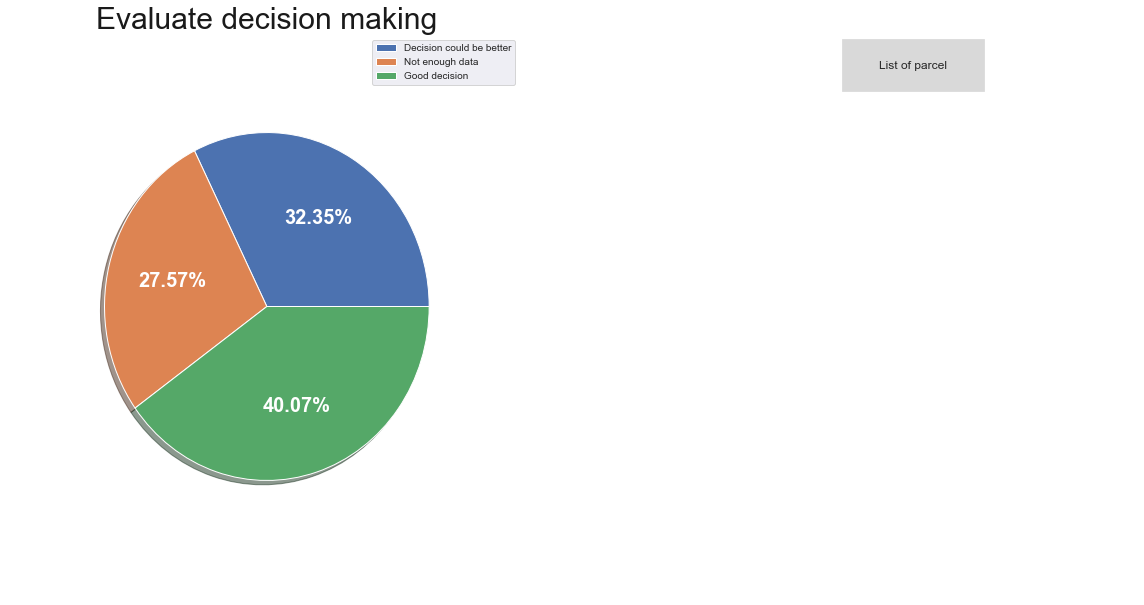

In [122]:
from matplotlib.widgets import Button

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
    
pie = [num,not_enough_data,good]
wedges, texts, autotexts = ax.pie(x=pie, labels=['Decision could be better','Not enough data','Good decision'],
                                      autopct=lambda pct: func2(pct, pie),radius=0.8,shadow=True, textprops=dict(color="w"))
plt.setp(autotexts,fontsize=20,fontweight='bold', color='w')
        
ax.set_title('Evaluate decision making',fontdict={'fontsize': 30, 'fontweight': 'medium', 'color': 'k'})
ax.legend(loc=1,fontsize=10)
props = dict(facecolor='white',edgecolor='dimgrey',alpha=0.5,pad=10)
text = "Parcel with good farmer's decision: \n"
"""for parcel in list(good_decision.keys()):
text += '\u2022'+parcel+'\n'
plt.figtext(0.99,0.4,text,bbox=props,fontsize=15,va='top', ha='left')"""

ax.axis('off')

plt.connect('button_press_event',on_click)
ax6 = fig.add_subplot(122)
axparcel = plt.axes([0.7, 0.8, 0.1, 0.075])
button = Button(axparcel, 'List of parcel')
button.on_clicked(_yes)

ax6.axis('off')
    

plt.show()